In [1]:
from drowsiness_detection import config

config.set_paths(30, 60)
import numpy as np
import matplotlib.pyplot as plt
from drowsiness_detection.data import (label_names_dict,
                                       load_experiment_objects_nn)
from drowsiness_detection.visualize import (plot_cv_test_train_scores_as_scatter,
    plot_learning_curve_from_keras_history)
from sklearn.metrics import classification_report


plt.rcParams["figure.figsize"] = 14, 7

In [5]:
exp_config, best_model, search_results, history = load_experiment_objects_nn(experiment_id=102,
                                                                             log_dir="../../logs_to_keep/")

loading from experiment with id:  102


distribution of model candidates for lstm

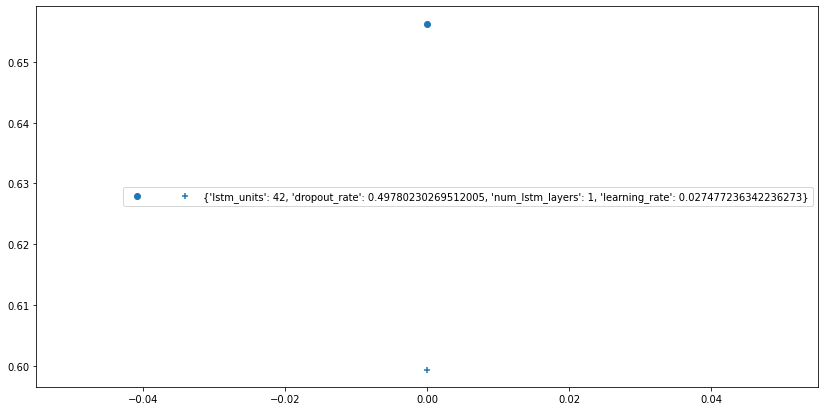

In [6]:
plot_cv_test_train_scores_as_scatter(search_results, model_type="lstm")

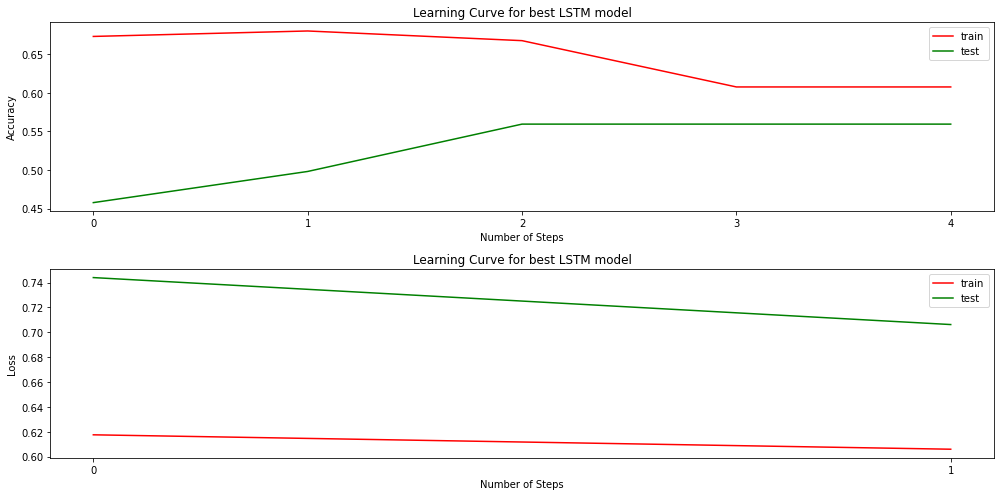

In [7]:
plot_learning_curve_from_keras_history(history, title="Learning Curve for best LSTM model")

plot roc curve of lstm

loading from experiment with id:  102
X_train shape: (25642, 1800, 7), y_train shape: (25642,)
X_test shape: (6494, 1800, 7), y_test shape: (6494,)
ID 102
[[nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]]
test accuracy = 0.5594394825993224
train accuracy = 0.6075579127993136



ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

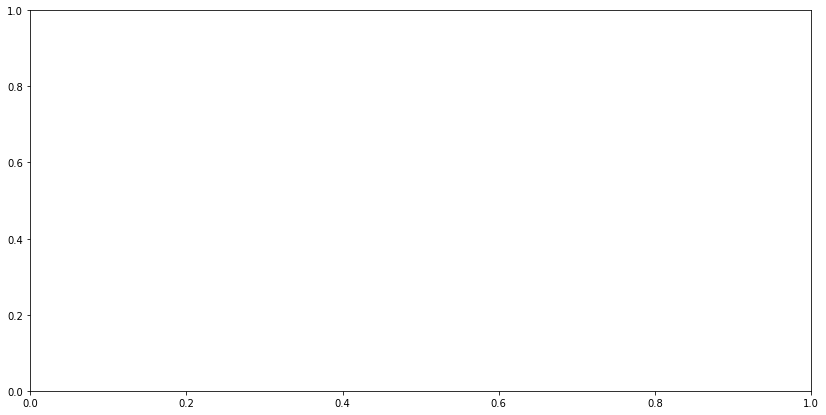

In [10]:
from sklearn.metrics import RocCurveDisplay
from drowsiness_detection.run_grid_search_experiment import load_experiment_data


def plot_roc_curve_from_log_dir(experiment_id, plot_train_roc: bool = False, ax=None,
                                pos_label=1):
    if ax is None:
        fig, ax = plt.subplots()

    exp_config, best_estimator, search_results, history = load_experiment_objects_nn(
        experiment_id=experiment_id,
        log_dir="../../logs_to_keep/")
    window_size = exp_config["window_in_sec"]
    config.set_paths(30, window_size)

    # load data
    X_train, X_test, y_train, y_test, _ = load_experiment_data(
        exclude_by=exp_config["exclude_by"],
        num_targets=exp_config["num_targets"],
        seed=exp_config["seed"],
        test_size=exp_config["test_size"],
        split_by_subjects=exp_config["split_by_subjects"],
        use_dummy_data=exp_config["use_dummy_data"],
        nn_experiment=exp_config["nn_experiment"],
        feature_col_indices=exp_config["feature_col_indices"],
    model_name=exp_config["model_name"])

    print(f"ID {experiment_id}")
    y_pred_test = best_estimator.predict(X_test)
    print(y_pred_test[:10])
    print(f"test accuracy = {np.mean((y_pred_test > .5) == y_test)}")
    y_pred_train = best_estimator.predict(X_train)
    print(f"train accuracy = {np.mean((y_pred_train > .5) == y_train)}")
    print()
    RocCurveDisplay.from_predictions(y_test, y_pred_test,
                                   name=f"RF-{window_size}s" + ("(test)" if plot_train_roc else ""),
                                   ax=ax, pos_label=pos_label)
    if plot_train_roc:
        RocCurveDisplay.from_estimator(y_train, y_pred_train,
                                       name=f"RF-{window_size}s(train)", ax=ax, pos_label=pos_label)


plot_roc_curve_from_log_dir(experiment_id=102)

cnn result analysis

In [11]:
exp_config, best_model, search_results, history = load_experiment_objects_nn(experiment_id=103,
                                                                             log_dir="../../logs_to_keep/")

loading from experiment with id:  103


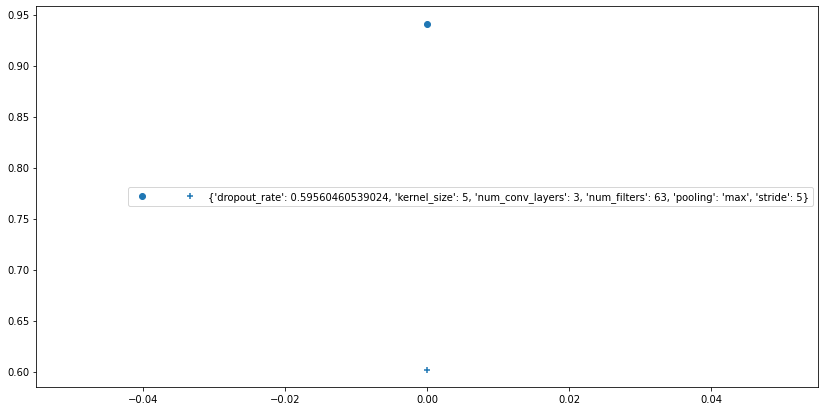

In [12]:
plot_cv_test_train_scores_as_scatter(search_results, model_type="cnn")

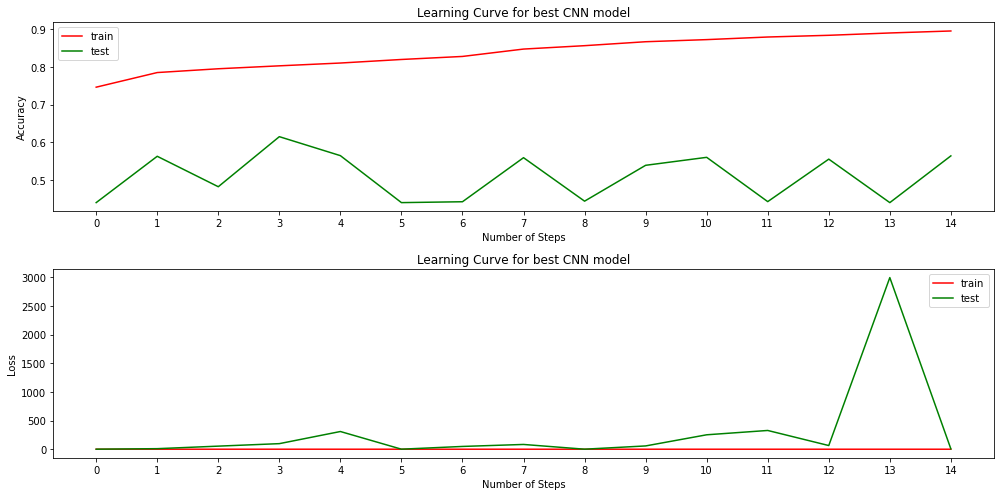

In [13]:
plot_learning_curve_from_keras_history(history, title="Learning Curve for best CNN model")

loading from experiment with id:  103
X_train shape: (25642, 1800, 7), y_train shape: (25642,)
X_test shape: (6494, 1800, 7), y_test shape: (6494,)
ID 103
[[0.46378142]
 [0.46378142]
 [0.46378142]
 [0.46378142]
 [0.46378142]
 [0.46378142]
 [0.46378142]
 [0.46378142]
 [0.46378142]
 [0.46378142]]
test accuracy = 0.5574441319361484
train accuracy = 0.6065260413950304



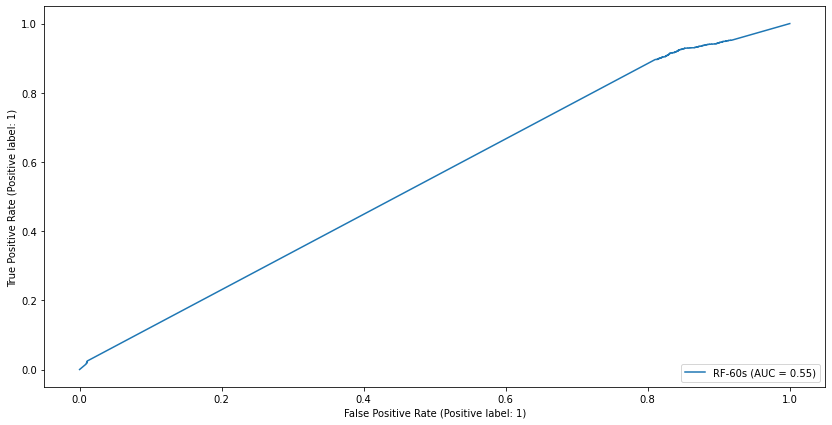

In [14]:
plot_roc_curve_from_log_dir(experiment_id=103)


### Plot classification report of best model for 10, 20 and 60 seconds data


In [ ]:
for experiment_id in (102,103,):
    exp_config, best_estimator, search_results, history = load_experiment_objects_nn(
        experiment_id=experiment_id,
        log_dir="../../logs/")
    window_size = exp_config["window_in_sec"]
    exp_config.set_paths(30, window_size)

    # load data
    X_train, X_test, y_train, y_test, _ = load_experiment_data(
        exclude_by=exp_config["exclude_by"],
        num_targets=exp_config["num_targets"],
        seed=exp_config["seed"],
        test_size=exp_config["test_size"],
        split_by_subjects=exp_config["split_by_subjects"],
        use_dummy_data=exp_config["use_dummy_data"],
        nn_experiment=exp_config["nn_experiment"],
        feature_col_indices=exp_config["feature_col_indices"],
    model_name=exp_config["model_name"])

    y_hat = best_estimator.predict(X_test)
    report = classification_report(y_true=y_test, y_pred=y_hat,
                                   target_names=label_names_dict[exp_config["num_targets"]])
    print(report)